<h1 align="center">AISC2000 - Group Trees - Assignment 3 Task Distribution and Status</h1>

| Individual Responsible | Task | Status | Results |
|:---|:---|:---|:---|
| **SUBHASH PAVAN CHAKRAVARTHY SOMAROUTHU** | Data Preprocessing and Feature Engineering | Class Separability Checked? Train and Test Handled Correctly? | Featureset with best separability? Steps taken before and after train test split? |
|  | Feature Importance Analysis (Random Forests) | Implemented? Compared with LIME/SHAP? | Key findings from comparison |
|  | Check feature importance using Random Forests | Implemented? | Key findings |
| **KANIKA** | Data Visualization for Feature Engineering | Visualizations created before model training? | Insights from visualizations |
|  | Next Steps Analysis | List out 2-3 possible next steps for each model |  |
|  | Summarize understanding of outputs from feature importance and tuning | Summary completed? | Key insights |
|  | Final Report Compilation | Compile all sections, ensure HTML export of Jupyter notebook |  |
| **GOKUL KRISHNA POURNAMI GOPI** | SVM Model (Parking Identification) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | SVM Model (Parking Validation) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Model Evaluation (All Models) | Confusion Matrix Built? AUC plotted? Accuracy computed? | F1 Score for Positive/Negative, AUC, Accuracy |
|  | Run 3 rounds of empirical tuning on SVM models | Tuning completed? | Performance improvements |
| **APARNA JAYAKUMAR RESMI** | Random Forest Model (Parking Identification) | Config of the model trained? Train Time? | Ensure >5000 data points in test set |
|  | Random Forest Model (Parking Validation) | Config of the model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on Random Forest models | Tuning completed? | Performance improvements |
| **CLIFFORD ADDISON** | XGBoost Model (Parking Identification) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | XGBoost Model (Parking Validation) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on XGBoost models | Tuning completed? | Performance improvements |
| **OBIANUJU NONYEREM ANUMA** | 1 Hidden Layer ANN (Parking Identification) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on 1 Hidden Layer ANN model | Tuning completed? | Performance improvements |
| **ABDULLAH IFTEQAR MOHAMMED** | Multi-Hidden Layer ANN (Parking Identification) | Config of model trained? Train Time? Use dropout, regularization, early stopping, and weight initialization. |
|  | Run 3 rounds of empirical tuning on Multi-Hidden Layer ANN model | Tuning completed? | Performance improvements |
| **MUKUL GARG** | Multi-Hidden Layer ANN (Parking Validation) | Config of model trained? Train Time? Use dropout, regularization, early stopping, and weight initialization. |
|  | Run 3 rounds of empirical tuning on Multi-Hidden Layer ANN model | Tuning completed? | Performance improvements |
| **AMRUTH RAJ MANCHIKANTI** | 1 Hidden Layer ANN (Parking Validation) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on 1 Hidden Layer ANN model | Tuning completed? | Performance improvements |
| **SANGEETH KUMARASINGHE** | LIME Analysis for All Models | LIME implemented for each model? | Key local interpretability findings |
|  | SHAP Analysis for All Models | SHAP values calculated for each model? | Global and local interpretability insights |
|  | Compare LIME and SHAP results | Comparison completed? | Key differences and similarities between LIME and SHAP interpretations |

## Individual Responsibilities for All Team Members
- Contribute to empirical tuning (3 rounds for your assigned models) and derive insights from each iteration.
- Review and validate results for your assigned models.
- Explain tuning approaches used in each iteration for your models.
- Call out what else could be done to tune your models and how it would have helped (with numbers) at the top/bottom of your section in the notebook.
- Ensure >5000 data points in the test set for your models' Confusion Matrix, AUC, etc.
- Submit your part of the Python notebook to be run sequentially end to end and exported as an HTML file

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
# pip install lime

In [6]:
# pip install gensim

In [9]:
# pip install xgboost

In [88]:
# pip install tensorflow

In [4]:
# pip install setuptools

In [ ]:
# Loading data from your drive
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [21]:
# Importing the necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

nltk.download('punkt')

import gensim

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import lime
import ast

import pickle
import warnings
warnings.filterwarnings('ignore')

# For ANN with 1 Layer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/obianujuanuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/obianujuanuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# pip install emoji

In [15]:
# pip install wordsegment

In [18]:
# pip install contractions

In [ ]:
# # Load the data
# df_chunks = []
# for chunk in pd.read_csv('/content/extracted_data/combined_data.csv', chunksize=100000):
#     df_chunks.append(chunk)
# df = pd.concat(df_chunks, ignore_index=True)
# print("Shape of Dataframe:", df.shape)

In [22]:

# Loading the Yelp business dataset JSON file

file_path = 'yelp_dataset/yelp_academic_dataset_business.json'
with open(file_path, 'r', encoding='utf-8') as file:
    business_data = [json.loads(line) for line in file]


business_df = pd.DataFrame(business_data)


business_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [23]:
business_df.shape

(150346, 14)

In [24]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [25]:
business_df['attributes'].head(20)

0                         {'ByAppointmentOnly': 'True'}
1                {'BusinessAcceptsCreditCards': 'True'}
2     {'BikeParking': 'True', 'BusinessAcceptsCredit...
3     {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4     {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
5     {'BusinessParking': 'None', 'BusinessAcceptsCr...
6     {'BusinessAcceptsCreditCards': 'True', 'Restau...
7                                                  None
8     {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
9     {'RestaurantsAttire': ''casual'', 'Restaurants...
10    {'RestaurantsPriceRange2': '2', 'BikeParking':...
11    {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
12    {'RestaurantsReservations': 'False', 'Restaura...
13                        {'ByAppointmentOnly': 'True'}
14    {'OutdoorSeating': 'False', 'RestaurantsGoodFo...
15    {'RestaurantsReservations': 'True', 'Restauran...
16    {'DriveThru': 'False', 'BusinessAcceptsCreditC...
17    {'BusinessParking': '{'garage': False, 'st

In [26]:
attributes_df = pd.json_normalize(business_df['attributes'])
attributes_df.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ByAppointmentOnly           42339 non-null   object
 1   BusinessAcceptsCreditCards  119765 non-null  object
 2   BikeParking                 72638 non-null   object
 3   RestaurantsPriceRange2      85314 non-null   object
 4   CoatCheck                   5584 non-null    object
 5   RestaurantsTakeOut          59857 non-null   object
 6   RestaurantsDelivery         56282 non-null   object
 7   Caters                      40127 non-null   object
 8   WiFi                        56914 non-null   object
 9   BusinessParking             91085 non-null   object
 10  WheelchairAccessible        28953 non-null   object
 11  HappyHour                   15171 non-null   object
 12  OutdoorSeating              48802 non-null   object
 13  HasTV                       4

In [28]:
# replacing nan values with empty dictionary
attributes_df['BusinessParking'] = attributes_df['BusinessParking'].apply(lambda x: {} if pd.isna(x) else x)


def convert_to_dict(value):
    if isinstance(value, dict):
        return value
    elif isinstance(value, str):
        try:

            return ast.literal_eval(value)
        except (ValueError, SyntaxError):

            return {}
    else:

        return {}


attributes_df['BusinessParking'] = attributes_df['BusinessParking'].apply(convert_to_dict)




In [29]:
parking_df = pd.json_normalize(attributes_df['BusinessParking'])



parking_df.columns = [f'BusinessParking_{col}' for col in parking_df.columns]

parking_df.head()

,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False
3,False,True,False,False,False
4,None,None,None,True,False


In [30]:
attributes_df = pd.concat([attributes_df.drop(columns=['BusinessParking']), parking_df], axis=1)



In [31]:
attributes_df.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',True,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
3,False,False,True,1,NaN,True,False,True,u'free',NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,...,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False


In [32]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ByAppointmentOnly           42339 non-null   object
 1   BusinessAcceptsCreditCards  119765 non-null  object
 2   BikeParking                 72638 non-null   object
 3   RestaurantsPriceRange2      85314 non-null   object
 4   CoatCheck                   5584 non-null    object
 5   RestaurantsTakeOut          59857 non-null   object
 6   RestaurantsDelivery         56282 non-null   object
 7   Caters                      40127 non-null   object
 8   WiFi                        56914 non-null   object
 9   WheelchairAccessible        28953 non-null   object
 10  HappyHour                   15171 non-null   object
 11  OutdoorSeating              48802 non-null   object
 12  HasTV                       45084 non-null   object
 13  RestaurantsReservations     4

In [33]:
merged_df = pd.concat([business_df, attributes_df], axis=1)
merged_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [35]:
parking_cols = ['BikeParking','BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated',
                'BusinessParking_lot', 'BusinessParking_valet']

merged_df['has_parking'] = merged_df[parking_cols].any(axis=1)

merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,False,True,False,False,False,True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,None,None,None,True,False,True


Business Details:

City: Some cities may have more businesses with parking than others.
State: Similar to city, state laws and geography might influence parking availability.
Postal Code: This could capture some regional variance.
Stars (Rating): Higher-rated businesses may offer parking to improve customer experience.
Review Count: More popular businesses might be more likely to provide parking due to higher customer volume.
Is Open (Business Status): Businesses that are currently open may be more likely to maintain parking areas.
Attributes from Exploded Columns:

ByAppointmentOnly: Businesses that operate by appointment only may not need parking.
BusinessAcceptsCreditCards: This could be an indicator of modernized services, which might correlate with parking availability.
RestaurantsPriceRange2: Higher-priced restaurants might offer parking as part of their customer experience.
RestaurantsTakeOut: Takeout-focused businesses may or may not need parking.
WiFi: Businesses offering WiFi might cater to customers who stay longer and thus provide parking.
WheelchairAccessible: Parking facilities may be more common in accessible businesses.
OutdoorSeating: This could be a proxy for outdoor space, which may correlate with available parking.
RestaurantsGoodForGroups: Businesses catering to groups might have parking to accommodate larger parties.
DriveThru: Drive-thru services may suggest availability of parking or space around the business.
NoiseLevel: Quieter or less crowded businesses might have different parking needs.
GoodForMeal: Attributes related to meals (breakfast, lunch, etc.) might correlate with the need for parking.
Other Parking-Related Features:

BusinessAcceptsBitcoin, Smoking, GoodForDancing, Music: These might be indicators of customer experience that could indirectly influence parking availability.

In [36]:
# Defining feature columns for the model
final_columns = [
    'name','city', 'state', 'stars', 'is_open','latitude','longitude',
    'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
    'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'WiFi',
    'WheelchairAccessible', 'OutdoorSeating', 'RestaurantsGoodForGroups',
    'DriveThru', 'NoiseLevel', 'GoodForMeal','Alcohol', 'BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated',
                'BusinessParking_lot', 'BusinessParking_valet', 'has_parking'
]

EDA_dataset=merged_df[final_columns]
EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,DriveThru,NoiseLevel,GoodForMeal,Alcohol,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,True,...,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,False,True,...,NaN,NaN,NaN,u'none',False,True,False,False,False,True
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,NaN,True,True,...,NaN,NaN,NaN,NaN,None,None,None,True,False,True


In [37]:
# Saving dataset for EDA
EDA_dataset.to_csv('EDA_dataset.csv', index=False)

In [38]:
# give your dataset path
EDA_dataset=pd.read_csv('EDA_dataset.csv')
EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,DriveThru,NoiseLevel,GoodForMeal,Alcohol,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,True,...,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,False,True,...,NaN,NaN,NaN,u'none',False,True,False,False,False,True
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True


**Data cleaning, preprocessing and feature engineering for Model**

In [39]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   name                        150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   stars                       150346 non-null  float64
 4   is_open                     150346 non-null  int64  
 5   latitude                    150346 non-null  float64
 6   longitude                   150346 non-null  float64
 7   ByAppointmentOnly           42299 non-null   object 
 8   BusinessAcceptsCreditCards  119692 non-null  object 
 9   BikeParking                 72558 non-null   object 
 10  RestaurantsPriceRange2      85280 non-null   float64
 11  RestaurantsTakeOut          57752 non-null   object 
 12  WiFi                        56864 non-null   object 
 13  WheelchairAcce

In [40]:
# Value_counts
for col in EDA_dataset.columns:
    print(f"Value counts for {col}:")
    print(EDA_dataset[col].value_counts(dropna=False))
    print("\n")


Value counts for name:
name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64


Value counts for city:
city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64


Value counts for state:
state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI

In [41]:
# percentage of missing values
missing_percentage = (EDA_dataset.isnull().sum() / len(EDA_dataset)) * 100
missing_percentage


name                           0.000000
city                           0.000000
state                          0.000000
stars                          0.000000
is_open                        0.000000
latitude                       0.000000
longitude                      0.000000
ByAppointmentOnly             71.865563
BusinessAcceptsCreditCards    20.388969
BikeParking                   51.739321
RestaurantsPriceRange2        43.277507
RestaurantsTakeOut            61.587272
WiFi                          62.177910
WheelchairAccessible          80.760379
OutdoorSeating                68.791986
RestaurantsGoodForGroups      70.635068
DriveThru                     95.340747
NoiseLevel                    74.755564
GoodForMeal                   80.854828
Alcohol                       71.298871
BusinessParking_garage        42.209969
BusinessParking_street        43.148471
BusinessParking_validated     42.363615
BusinessParking_lot           42.455403
BusinessParking_valet         40.939566


In [42]:
# Imputing missing values
EDA_dataset['ByAppointmentOnly'].fillna(False, inplace=True)

# Dropping unnecessary columns
EDA_dataset.drop(columns=['BusinessAcceptsCreditCards', 'OutdoorSeating', 'DriveThru',
                          'NoiseLevel', 'GoodForMeal', 'Alcohol'], inplace=True)

# Filling missing values with False
EDA_dataset['BikeParking'].fillna(False, inplace=True)
EDA_dataset['RestaurantsPriceRange2'].fillna(EDA_dataset['RestaurantsPriceRange2'].mode()[0], inplace=True)
EDA_dataset['RestaurantsTakeOut'].fillna(False, inplace=True)
EDA_dataset['WiFi'].fillna('no', inplace=True)
EDA_dataset['WheelchairAccessible'].fillna(False, inplace=True)
EDA_dataset['RestaurantsGoodForGroups'].fillna(False, inplace=True)

# I
EDA_dataset.loc[EDA_dataset['has_parking'] == False, ['BusinessParking_garage',
                                                       'BusinessParking_street',
                                                       'BusinessParking_validated',
                                                       'BusinessParking_lot',
                                                       'BusinessParking_valet',
                                                       'BikeParking']] = False

for col in ['BusinessParking_garage', 'BusinessParking_street',
            'BusinessParking_validated', 'BusinessParking_lot',
            'BusinessParking_valet', 'BikeParking']:
    EDA_dataset.loc[EDA_dataset['has_parking'] == True, col] = EDA_dataset.loc[EDA_dataset['has_parking'] == True, col].fillna(True)


In [43]:
# percentage of missing values
missing_percentage = (EDA_dataset.isnull().sum() / len(EDA_dataset)) * 100
missing_percentage


name                         0.0
city                         0.0
state                        0.0
stars                        0.0
is_open                      0.0
latitude                     0.0
longitude                    0.0
ByAppointmentOnly            0.0
BikeParking                  0.0
RestaurantsPriceRange2       0.0
RestaurantsTakeOut           0.0
WiFi                         0.0
WheelchairAccessible         0.0
RestaurantsGoodForGroups     0.0
BusinessParking_garage       0.0
BusinessParking_street       0.0
BusinessParking_validated    0.0
BusinessParking_lot          0.0
BusinessParking_valet        0.0
has_parking                  0.0
dtype: float64

In [44]:

# Target variable creation
def create_parking_status(row):
    if row['has_parking'] == False:
        return 0  # No parking
    elif row['has_parking'] == True and row['BusinessParking_validated'] == False:
        return 1  # Has parking but not validated
    elif row['has_parking'] == True and row['BusinessParking_validated'] == True:
        return 2  # Has parking and validated


EDA_dataset['parking_status'] = EDA_dataset.apply(create_parking_status, axis=1)

EDA_dataset.head()


,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,...,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking,parking_status
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,False,2.0,...,no,False,False,False,False,False,False,False,False,0
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,False,False,2.0,...,no,False,False,False,False,False,False,False,False,0
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,2.0,...,u'no',True,False,False,False,False,True,False,True,1
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,True,1.0,...,u'free',False,False,False,True,False,False,False,True,1
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,False,True,2.0,...,no,True,False,True,True,True,True,False,True,2


In [45]:
#
for col in EDA_dataset.columns:
    print(f"Value counts for {col}:")
    print(EDA_dataset[col].value_counts(dropna=False))
    print("\n")


Value counts for name:
name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64


Value counts for city:
city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64


Value counts for state:
state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI

In [46]:
# Data fomatting in Wifi column


EDA_dataset['WiFi'] = EDA_dataset['WiFi'].replace({
    "no": "no",
    "u'no'": "no",
    "'no'": "no",
    "u'free'": "free",
    "'free'": "free",
    "paid": "paid",
    "u'paid'": "paid",
    "'paid'": "paid",
    'None': 'no'
})


EDA_dataset['WiFi'].fillna('no', inplace=True)






print(EDA_dataset['WiFi'].value_counts())


WiFi
no      115313
free     34414
paid       619
Name: count, dtype: int64


In [47]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       150346 non-null  object 
 1   city                       150346 non-null  object 
 2   state                      150346 non-null  object 
 3   stars                      150346 non-null  float64
 4   is_open                    150346 non-null  int64  
 5   latitude                   150346 non-null  float64
 6   longitude                  150346 non-null  float64
 7   ByAppointmentOnly          150346 non-null  bool   
 8   BikeParking                150346 non-null  bool   
 9   RestaurantsPriceRange2     150346 non-null  float64
 10  RestaurantsTakeOut         150346 non-null  bool   
 11  WiFi                       150346 non-null  object 
 12  WheelchairAccessible       150346 non-null  bool   
 13  RestaurantsGoodForGroups   15

**Feature Engineering**

Created new column city_encoded which is the frequency of cities

In [48]:

# Frequency encoding for city
city_counts = EDA_dataset['city'].value_counts()
EDA_dataset['city_encoded'] = EDA_dataset['city'].map(city_counts)

EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,...,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking,parking_status,city_encoded
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,False,2.0,...,False,False,False,False,False,False,False,False,0,3829
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,False,False,2.0,...,False,False,False,False,False,False,False,False,0,36
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,2.0,...,True,False,False,False,False,True,False,True,1,9250
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,True,1.0,...,False,False,False,True,False,False,False,True,1,14569
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,False,True,2.0,...,True,False,True,True,True,True,False,True,2,10


In [49]:
EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,...,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking,parking_status,city_encoded
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,False,2.0,...,False,False,False,False,False,False,False,False,0,3829
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,False,False,2.0,...,False,False,False,False,False,False,False,False,0,36
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,2.0,...,True,False,False,False,False,True,False,True,1,9250
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,True,1.0,...,False,False,False,True,False,False,False,True,1,14569
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,False,True,2.0,...,True,False,True,True,True,True,False,True,2,10


In [50]:
# REMOVING UNNECESSARY COLUMNS
EDA_dataset.drop(columns=['city', 'state','name','BusinessParking_validated','has_parking'], inplace=True)

In [51]:
EDA_dataset.head()

,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,True,False,2.0,False,no,False,False,False,False,False,False,0,3829
1,3.0,1,38.551126,-90.335695,False,False,2.0,False,no,False,False,False,False,False,False,0,36
2,3.5,0,32.223236,-110.880452,False,True,2.0,False,no,True,False,False,False,True,False,1,9250
3,4.0,1,39.955505,-75.155564,False,True,1.0,True,free,False,False,False,True,False,False,1,14569
4,4.5,1,40.338183,-75.471659,False,True,2.0,True,no,True,False,True,True,True,False,2,10


In [52]:
# categorical encoding
bool_columns = ['ByAppointmentOnly', 'BikeParking',
                'RestaurantsTakeOut', 'WheelchairAccessible',
                'RestaurantsGoodForGroups',
                'BusinessParking_garage', 'BusinessParking_street',
                 'BusinessParking_lot',
                'BusinessParking_valet']

EDA_dataset[bool_columns] = EDA_dataset[bool_columns].astype(int)

EDA_dataset.head()


,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,1,0,2.0,0,no,0,0,0,0,0,0,0,3829
1,3.0,1,38.551126,-90.335695,0,0,2.0,0,no,0,0,0,0,0,0,0,36
2,3.5,0,32.223236,-110.880452,0,1,2.0,0,no,1,0,0,0,1,0,1,9250
3,4.0,1,39.955505,-75.155564,0,1,1.0,1,free,0,0,0,1,0,0,1,14569
4,4.5,1,40.338183,-75.471659,0,1,2.0,1,no,1,0,1,1,1,0,2,10


In [53]:
# modifying wifi column

EDA_dataset['WiFi'] = EDA_dataset['WiFi'].apply(lambda x: 0 if x == 'no' else 1)

EDA_dataset.head()


,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,1,0,2.0,0,0,0,0,0,0,0,0,0,3829
1,3.0,1,38.551126,-90.335695,0,0,2.0,0,0,0,0,0,0,0,0,0,36
2,3.5,0,32.223236,-110.880452,0,1,2.0,0,0,1,0,0,0,1,0,1,9250
3,4.0,1,39.955505,-75.155564,0,1,1.0,1,1,0,0,0,1,0,0,1,14569
4,4.5,1,40.338183,-75.471659,0,1,2.0,1,0,1,0,1,1,1,0,2,10


In [54]:
#Saving the dataset for modelling

EDA_dataset.to_csv('Model_dataset.csv', index=False)



In [56]:
model_df=pd.read_csv('Model_dataset.csv')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   stars                     150346 non-null  float64
 1   is_open                   150346 non-null  int64  
 2   latitude                  150346 non-null  float64
 3   longitude                 150346 non-null  float64
 4   ByAppointmentOnly         150346 non-null  int64  
 5   BikeParking               150346 non-null  int64  
 6   RestaurantsPriceRange2    150346 non-null  float64
 7   RestaurantsTakeOut        150346 non-null  int64  
 8   WiFi                      150346 non-null  int64  
 9   WheelchairAccessible      150346 non-null  int64  
 10  RestaurantsGoodForGroups  150346 non-null  int64  
 11  BusinessParking_garage    150346 non-null  int64  
 12  BusinessParking_street    150346 non-null  int64  
 13  BusinessParking_lot       150346 non-null  i

Next steps:

split the dataset and use standardization and train the model

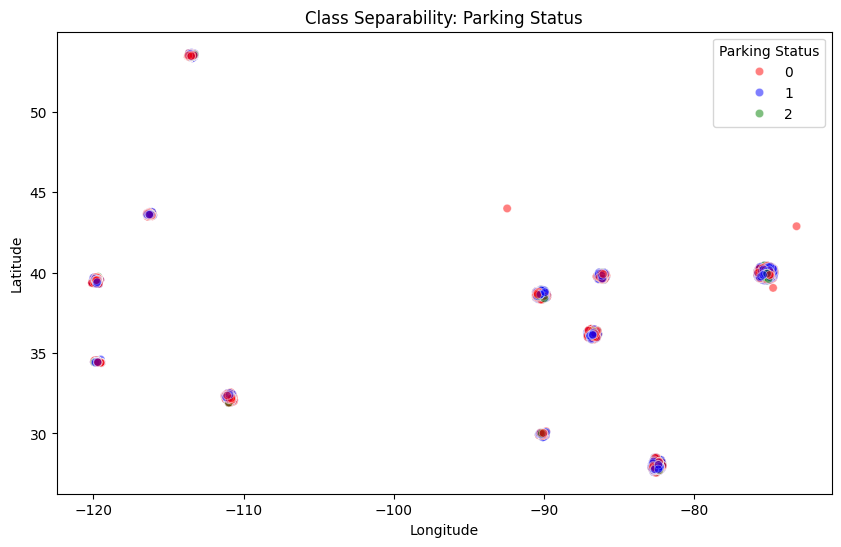

In [55]:


# Scatter plot to check class separability
plt.figure(figsize=(10, 6))
palette = {0: 'red', 1: 'blue',2:'green'}
sns.scatterplot(data=EDA_dataset, x='longitude', y='latitude', hue='parking_status',palette=palette,alpha=0.5)
plt.title('Class Separability: Parking Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Parking Status')
plt.show()


***Train test split***

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = EDA_dataset.drop(columns=['parking_status'])
y = EDA_dataset['parking_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (120276, 16)
Shape of x_test: (30070, 16)
Shape of y_train: (120276,)
Shape of y_test: (30070,)


In [58]:
#Class imbalance
y_train.value_counts()

parking_status
1    60919
0    53079
2     6278
Name: count, dtype: int64

In [59]:
# pip install imblearn

In [60]:
#smote

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)



print(y_train_smote.value_counts())



parking_status
0    60919
1    60919
2    60919
Name: count, dtype: int64


# standardization

not needed for tree based models. But if you want to do ,please make sure to pass this in pipeline


In [61]:
from sklearn.ensemble import RandomForestClassifier

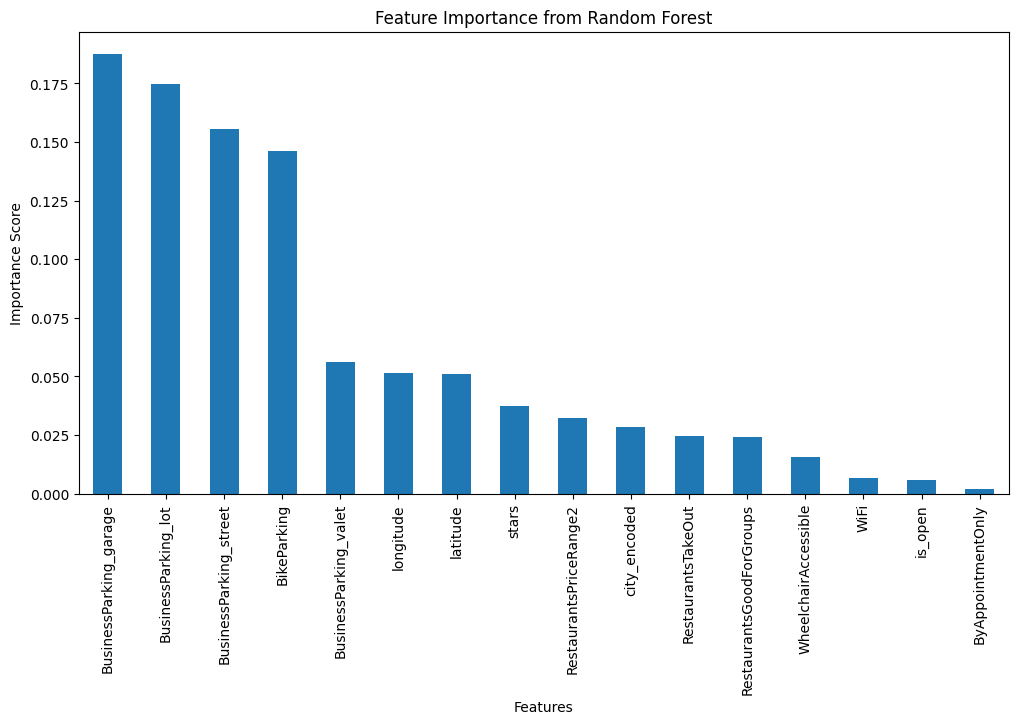

In [62]:
# Feature importance using Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_smote, y_train_smote)


importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()



### summary

1. **Data Cleaning**:
   - Addressed missing values by filling with appropriate substitutes (eg `False` for boolean features, mode for categorical features).

2. **Feature Engineering**:
   - Converted boolean values to integers (0 and 1) for easier modeling.
   - Used frequency encoding for city, replacing cities with their counts of occurrences.


### Feature Explanation and Relation to parking_status

1. **stars**:
   - higher ratings may correlate with better amenities, including parking.

2. **is_open**:
   - Indicates whether the business is currently open, affecting customer flow and parking needs.

3. **latitude and longitude**:
   - Geographical features help identify location-related parking dynamics.

4. **ByAppointmentOnly**:
   - Appointment-only businesses may have fewer visitors at any time, reducing parking demand.

5. **BikeParking**: self explnatory

6. **RestaurantsPriceRange2**:
   - Price range attracts different demographics, impacting expected customer volumes and parking needs.

7. **RestaurantsTakeOut**:
   - Takeout options may result in no parking requirements compared to dine-in services.

8. **WiFi**:
   - Availability can attract more customers who may stay longer, influencing parking duration.

9. **WheelchairAccessible**:
   - Accessibility features are important for certain segments, potentially affecting parking usage.

10. **RestaurantsGoodForGroups**:
    - Suitable for group gatherings, leading to larger customer volumes and increased parking demand.

11. **BusinessParking_garage, BusinessParking_street, BusinessParking_lot, BusinessParking_valet**:
    - Direct indicators of available parking types; critical for predicting parking availability.

12. **city_encoded**:
    - Represents city frequency,some cities may have more or fewer parking challenges based on urban factors.

**Target Variable** - Parking Status

 values - 0 indicate no parking

 value - 1 indicate parking available but not validated

 value -2 indicates parking available and validated



**Train test split**

**SMOTE to handle imbalance in the data**

**Feature Importance using Random Forest**

**Will compare feature importance after implementation of Lime**


#### Summary of outputs from feature importance:

- **Parking options** (lot, garage, street) dominate the feature importance ranking, indicating that easy access to parking is a major factor in business performance or customer satisfaction.

- **Geographical location** (longitude and latitude) also plays a significant role, suggesting that where a business is located can affect its success.

- **Price range** is moderately important, meaning that while price matters, other factors like parking have a stronger influence.

- Features like **WiFi** and **wheelchair accessibility**, while important from a customer service standpoint, contribute less to the model's predictive power.

### Data Visualisation for Feature Engineering

In [63]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   stars                     150346 non-null  float64
 1   is_open                   150346 non-null  int64  
 2   latitude                  150346 non-null  float64
 3   longitude                 150346 non-null  float64
 4   ByAppointmentOnly         150346 non-null  int64  
 5   BikeParking               150346 non-null  int64  
 6   RestaurantsPriceRange2    150346 non-null  float64
 7   RestaurantsTakeOut        150346 non-null  int64  
 8   WiFi                      150346 non-null  int64  
 9   WheelchairAccessible      150346 non-null  int64  
 10  RestaurantsGoodForGroups  150346 non-null  int64  
 11  BusinessParking_garage    150346 non-null  int64  
 12  BusinessParking_street    150346 non-null  int64  
 13  BusinessParking_lot       150346 non-null  i

In [64]:
EDA_dataset.describe()

,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
count,150346.000000,150346.00000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000
mean,3.596724,0.79615,36.671150,-89.357339,0.103821,0.366089,1.868377,0.352141,0.233016,0.172888,0.253735,0.072918,0.206184,0.340721,0.044018,0.610891,4466.113006
std,0.974421,0.40286,5.872759,14.918502,0.305029,0.481736,0.500559,0.477639,0.422754,0.378152,0.435149,0.260003,0.404566,0.473953,0.205137,0.584897,4620.956450
min,1.000000,0.00000,27.555127,-120.095137,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.00000,32.187293,-90.357810,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,313.000000
50%,3.500000,1.00000,38.777413,-86.121179,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2937.000000
75%,4.500000,1.00000,39.954036,-75.421542,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7540.000000
max,5.000000,1.00000,53.679197,-73.200457,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,14569.000000


#### Handling Categorical Variables

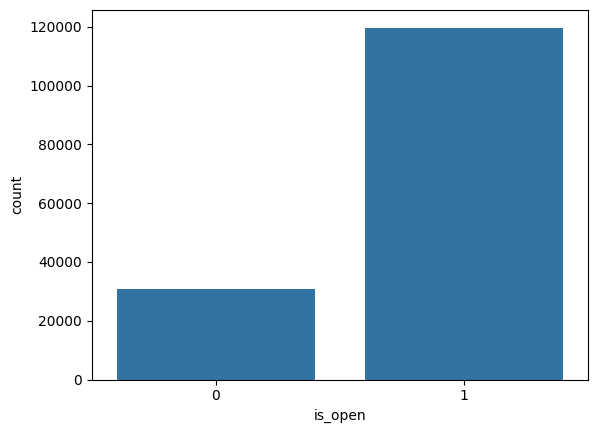

In [65]:
#Countplots: To visualize how binary features are distributed
sns.countplot(x='is_open', data=EDA_dataset)
plt.show()

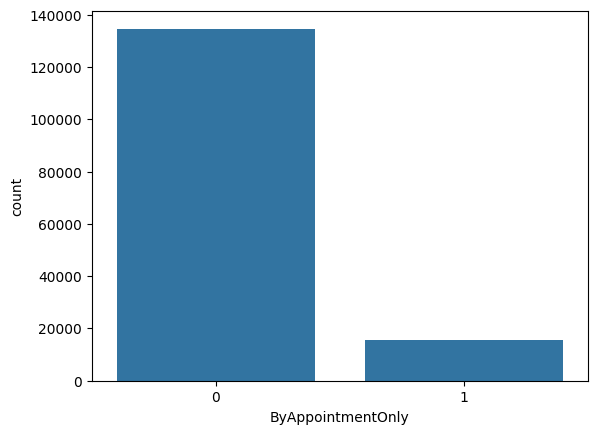

In [66]:
sns.countplot(x='ByAppointmentOnly', data=EDA_dataset)
plt.show()

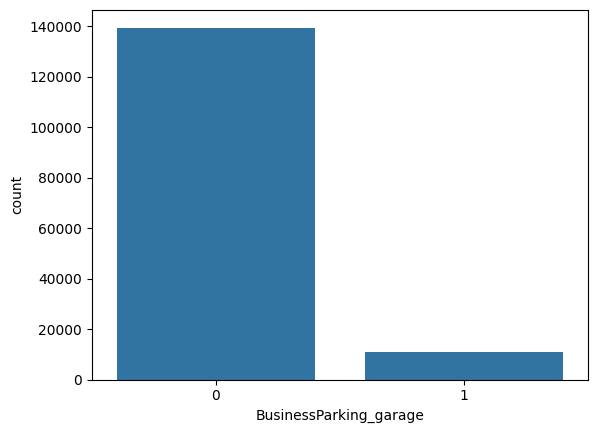

In [67]:
#Bar Plots for Parking Features: To check how many businesses offer parking facilities
sns.countplot(x='BusinessParking_garage', data=EDA_dataset)
plt.show()

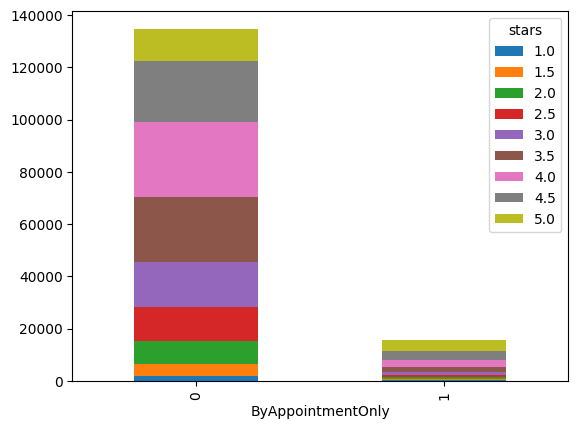

In [68]:
#Cross-tabulation: To compare the relationships between features
pd.crosstab(EDA_dataset['ByAppointmentOnly'], EDA_dataset['stars']).plot(kind='bar', stacked=True)
plt.show()

#### Correlation for Numerical Variables

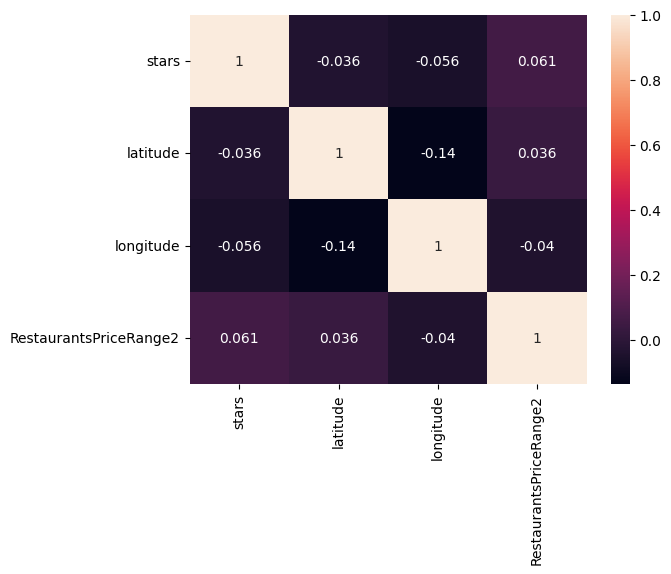

In [69]:
#Heatmap: To find correlations between numerical variables like stars, latitude, longitude and RestaurantsPriceRange2
correlation_matrix = EDA_dataset[['stars', 'latitude', 'longitude', 'RestaurantsPriceRange2']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Outlier Detection

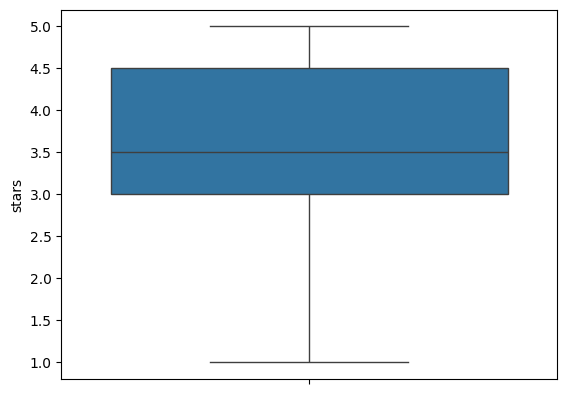

In [70]:
#Boxplot: To detect outliers in numerical columns like stars or RestaurantsPriceRange2
sns.boxplot(y='stars', data=EDA_dataset)
plt.show()

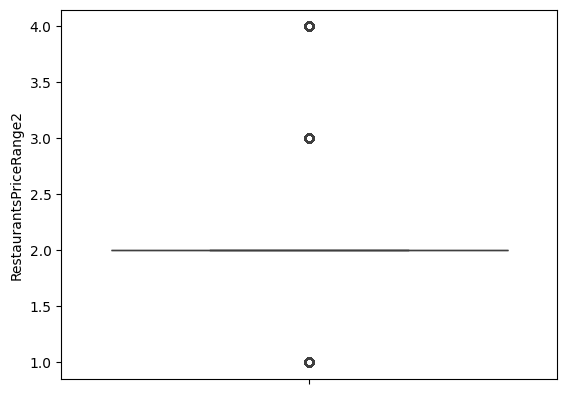

In [71]:
sns.boxplot(y='RestaurantsPriceRange2', data=EDA_dataset)
plt.show()

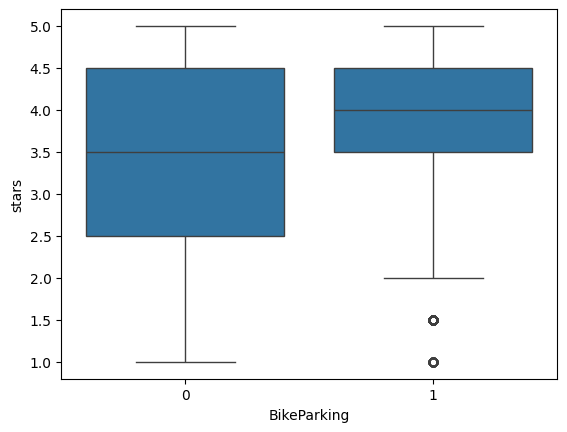

In [72]:
sns.boxplot(x='BikeParking', y='stars', data=EDA_dataset)
plt.show()

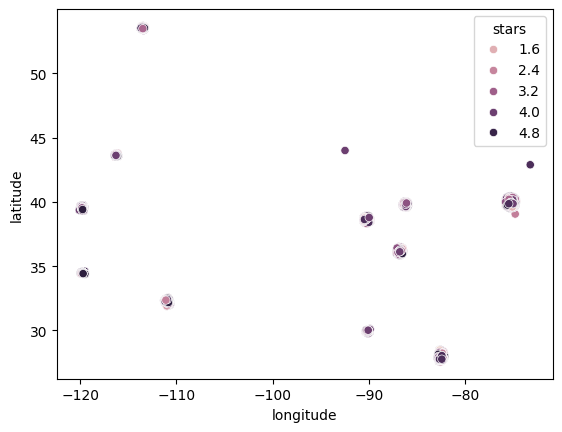

In [73]:
sns.scatterplot(x='longitude', y='latitude', hue='stars', data=EDA_dataset)
plt.show()

#### Distribution of Numerical Variables

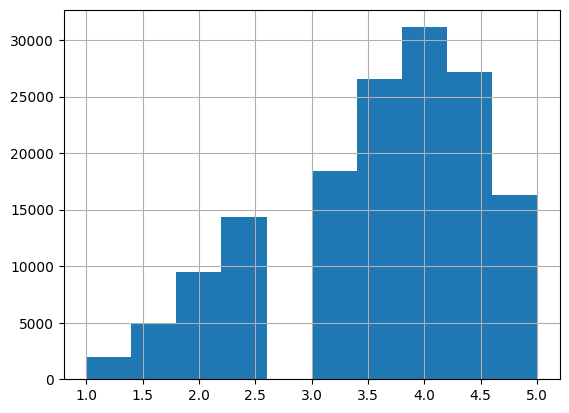

In [74]:
#Histograms: To visualize the distribution of continuous variables like stars and RestaurantsPriceRange2
EDA_dataset['stars'].hist()
plt.show()

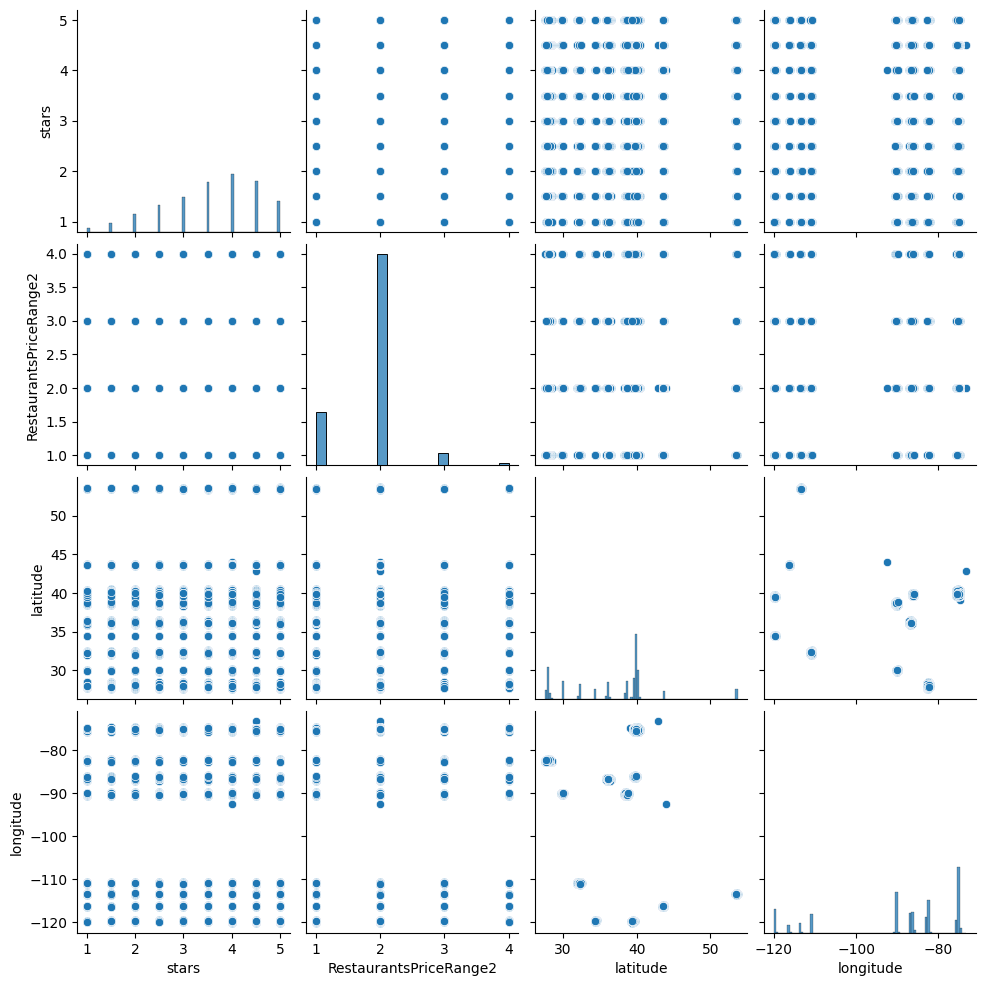

In [75]:
#Multivariate Analysis
#Pairplots: To explore more advanced relationships between multiple variables
sns.pairplot(EDA_dataset[['stars', 'RestaurantsPriceRange2', 'latitude', 'longitude']])
plt.show()

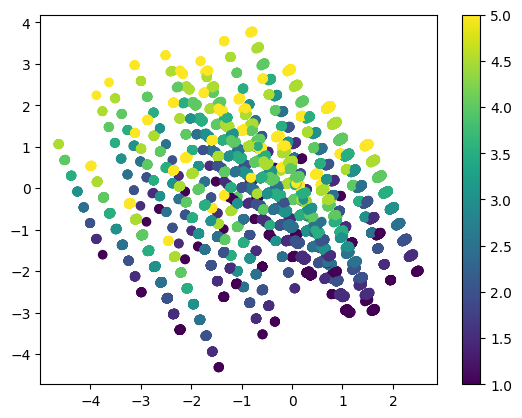

In [76]:
#Dimensionality Reduction (PCA)

# Standardizing the numerical features
numerical_features = ['stars', 'RestaurantsPriceRange2', 'latitude', 'longitude']
scaled_data = StandardScaler().fit_transform(EDA_dataset[numerical_features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualizing the two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=EDA_dataset['stars'], cmap='viridis')
plt.colorbar()
plt.show()

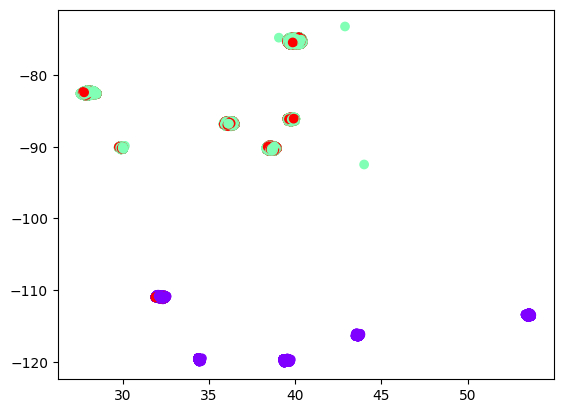

In [77]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)
EDA_dataset['cluster'] = clusters

# Visualizing clusters
plt.scatter(EDA_dataset['latitude'], EDA_dataset['longitude'], c=clusters, cmap='rainbow')
plt.show()

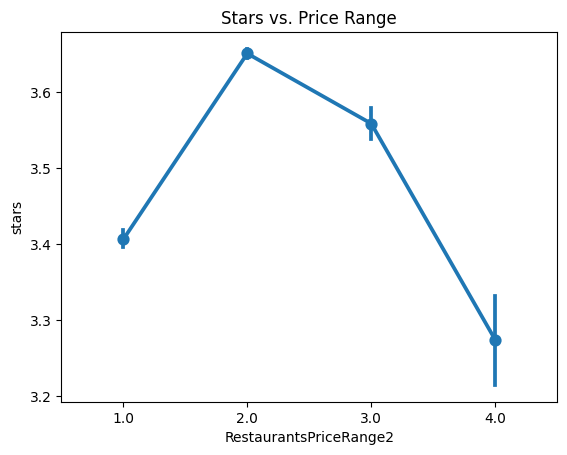

In [78]:
sns.pointplot(x='RestaurantsPriceRange2', y='stars', data=EDA_dataset)
plt.title('Stars vs. Price Range')
plt.show()

#### Key Insights from the Visualizations

**1. is_open Countplot:**
A majority of the businesses are open (1), while a smaller proportion is closed (0). This indicates that most data relates to active businesses, which may suggest that the dataset is skewed towards currently operating entities.

**2. ByAppointmentOnly Countplot:**
Most businesses do not operate by appointment only (0), with only a small subset requiring appointments (1). This suggests that walk-in services are more common than appointment-based operations.

**3. BusinessParking_garage Countplot:**
A significant majority of businesses do not have garage parking (0), while only a small portion offers this amenity (1). Garage parking is relatively rare.

**4. Stacked Bar Chart (ByAppointmentOnly vs stars):**
Businesses that do not require appointments (0) have a wider distribution of ratings, with a noticeable portion receiving 4.0 stars or more. Appointment-only businesses (1) tend to have fewer total reviews, and most of them seem to have a rating close to 4 stars. This suggests that appointment-only businesses might operate in a smaller niche but receive consistent ratings.

**5. Correlation Heatmap:**
There is a low correlation between stars and other numerical variables such as latitude, longitude, and RestaurantsPriceRange2. The correlation values are close to 0, meaning no strong linear relationships exist between these variables and the business ratings (stars).

**6. Boxplot of stars:**
The distribution of stars is relatively concentrated, with most businesses receiving ratings between 3.5 and 4.5 stars. There are no extreme outliers, indicating that most businesses are similarly rated.

**7. Boxplot of RestaurantsPriceRange2:**
The boxplot shows a few outliers in the higher price ranges. This suggests that while most restaurants fall into a moderate price range, there are some that are more expensive, and those are represented as outliers.

**8. Boxplot of BikeParking vs stars:**
Businesses with bike parking tend to have slightly higher ratings on average than those without bike parking. This suggests that bike parking might be a valued amenity for certain customers.

**9. Scatterplot of latitude vs longitude with stars:**
The plot shows geographic locations of businesses based on latitude and longitude, with the color representing their ratings (stars). There doesn’t appear to be a strong geographic pattern in terms of business ratings.

**10. Histogram of stars:**
Most businesses have ratings between 3.0 and 4.5 stars, with the highest concentration around 4.0 stars. Few businesses have very low ratings, indicating that overall ratings skew towards the positive side.

**11. Pairplot:**
The pairplot shows relationships between different variables (stars, RestaurantsPriceRange2, latitude, and longitude). No clear patterns or strong relationships are evident from this plot, which aligns with the low correlations observed earlier.

**12. PCA Visualization:**
The PCA projection shows no clear separation of businesses based on their ratings (stars). The ratings are spread across the principal components, suggesting that the first two components do not capture most of the variance related to business ratings.

**13. Clustering Visualization (Latitude vs Longitude):**
The scatter plot shows geographically clustered businesses based on their latitude and longitude. Each cluster represents businesses located near each other, indicating that spatial proximity plays a role in clustering. Some clusters are more concentrated, while others are more spread out.

**14. Pointplot (RestaurantsPriceRange2 vs stars):**
Businesses with price range 3 tend to have the highest average ratings (stars), while those in the lowest (1) and highest (4) price ranges tend to have slightly lower ratings. This suggests that mid-range restaurants receive the highest customer satisfaction.

#### Next Steps to enhance each model:

**1. SVM:**

Scale features like latitude, longitude, and RestaurantsPriceRange2.

Handle outliers in price range.

Try non-linear kernels (e.g., RBF) for better performance.


**2. Random Forest:**

Focus on important features (e.g., parking-related features).

Perform hyperparameter tuning (e.g., n_estimators, max_depth).

Address class imbalance in categorical features.


**3. XGBoost:**

Engineer feature interactions (e.g., between latitude and longitude).

Tune hyperparameters like learning_rate and max_depth.

Adjust class imbalance using scale_pos_weight.

**4. Hidden Layer ANN:**

Normalize input features.

Experiment with different activation functions.

Tune the number of neurons and layers.

**5. Multilayer ANN:**

Scale input features.

Use dropout regularization to prevent overfitting.

Optimize layer depth and learning rate.

**6. Naive Bayes:**

Use Gaussian Naive Bayes for continuous features.

Ensure feature independence assumptions or reduce feature correlation.

Binarize categorical features.

## Random Forest

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Load the dataset
data = pd.read_csv('Model_dataset.csv')

# Display basic information about the dataset
data.info()

# Display the first five rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   stars                     150346 non-null  float64
 1   is_open                   150346 non-null  int64  
 2   latitude                  150346 non-null  float64
 3   longitude                 150346 non-null  float64
 4   ByAppointmentOnly         150346 non-null  int64  
 5   BikeParking               150346 non-null  int64  
 6   RestaurantsPriceRange2    150312 non-null  float64
 7   RestaurantsTakeOut        150346 non-null  int64  
 8   WiFi                      150346 non-null  int64  
 9   WheelchairAccessible      150346 non-null  int64  
 10  RestaurantsGoodForGroups  150346 non-null  int64  
 11  BusinessParking_garage    150346 non-null  int64  
 12  BusinessParking_street    150346 non-null  int64  
 13  BusinessParking_lot       150346 non-null  i

,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,1,0,2.0,0,0,0,0,0,0,0,0,0,3829
1,3.0,1,38.551126,-90.335695,0,0,2.0,0,0,0,0,0,0,0,0,0,36
2,3.5,0,32.223236,-110.880452,0,1,2.0,0,0,1,0,0,0,1,0,1,9250
3,4.0,1,39.955505,-75.155564,0,1,1.0,1,1,0,0,0,1,0,0,1,14569
4,4.5,1,40.338183,-75.471659,0,1,2.0,1,0,1,0,1,1,1,0,2,10


In [32]:
# Prepare features and target variables
X = data.drop(['parking_status', 'city_encoded'], axis=1)

# Create binary target for parking availability (1 if any parking type is available, 0 otherwise)
y_has_parking = (data['BusinessParking_garage'] | data['BusinessParking_street'] |
                 data['BusinessParking_lot'] | data['BusinessParking_valet']).astype(int)

# Target for validated parking status
y_validated = data['parking_status']

# Split the data for the first model (has parking)
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X, y_has_parking, test_size=0.2, random_state=42)

# Filter data for businesses with parking
businesses_with_parking = data[y_has_parking == 1]

# Prepare features and target for parking validation model
X_parking = businesses_with_parking.drop(['parking_status', 'city_encoded'], axis=1)
y_validated = businesses_with_parking['parking_status']

# Split the data for the second model (validated parking)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_parking, y_validated, test_size=0.2, random_state=42)

# Print the size of test sets for both models
print(f"Number of samples in test set (has parking): {len(X_test_hp)}")
print(f"Number of samples in test set (validated parking): {len(X_test_v)}")

Number of samples in test set (has parking): 30070
Number of samples in test set (validated parking): 13851


In [33]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, task):
    rf = RandomForestClassifier(random_state=42)
    start_time = time.time()
    rf.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nRandom Forest Model ({task}):")
    print(f"Config: {rf.get_params()}")
    print(f"Train Time: {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    return rf, train_time

def empirical_tuning(X_train, X_test, y_train, y_test, task):
    # Define hyperparameter search space
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, 40, 50, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    rf = RandomForestClassifier(random_state=42)
    # Perform randomized search with 10 iterations and 3-fold cross-validation
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=3, random_state=42, n_jobs=-1)

    start_time = time.time()
    rf_random.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = rf_random.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nTuned Random Forest Model ({task}):")
    print(f"Best Config: {rf_random.best_params_}")
    print(f"Train Time: {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    return rf_random, train_time

In [34]:
print("Initial Models:")
# Train and evaluate Random Forest model for predicting parking availability
rf_has_parking, hp_time = train_evaluate_rf(X_train_hp, X_test_hp, y_train_hp, y_test_hp, "Has Parking")

# Train and evaluate Random Forest model for validating parking status
rf_validated, val_time = train_evaluate_rf(X_train_v, X_test_v, y_train_v, y_test_v, "Validated Parking")

print(f"\nTotal initial training time: {hp_time + val_time:.2f} seconds")

Initial Models:

Random Forest Model (Has Parking):
Config: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Train Time: 10.68 seconds
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16251
           1       1.00      1.00      1.00     13819

    accuracy                           1.00     30070
   macro avg       1.00      1.00      1.00     30070
weighted avg       1.00      1.00      1.00     30070


Random Forest Model (Validated Parking):
Config: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_f

In [35]:
total_tuning_time = 0

# Perform multiple rounds of hyperparameter tuning for both models
for i in range(3):
    print(f"\nTuning Round {i+1}")

    # Tune the "Has Parking" model
    rf_hp_tuned, hp_tune_time = empirical_tuning(X_train_hp, X_test_hp, y_train_hp, y_test_hp, "Has Parking")

    # Tune the "Validated Parking" model
    rf_val_tuned, val_tune_time = empirical_tuning(X_train_v, X_test_v, y_train_v, y_test_v, "Validated Parking")

    round_time = hp_tune_time + val_tune_time
    total_tuning_time += round_time
    print(f"Tuning time for round {i+1}: {round_time:.2f} seconds")

print(f"\nTotal tuning time: {total_tuning_time:.2f} seconds")


Tuning Round 1

Tuned Random Forest Model (Has Parking):
Best Config: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Train Time: 250.46 seconds
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16251
           1       1.00      1.00      1.00     13819

    accuracy                           1.00     30070
   macro avg       1.00      1.00      1.00     30070
weighted avg       1.00      1.00      1.00     30070


Tuned Random Forest Model (Validated Parking):
Best Config: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
Train Time: 145.31 seconds
Accuracy: 0.9653
              precision    recall  f1-score   support

           1       0.97      1.00      0.98     12272
           2       0.95      0.73      0.83      1579

    accuracy                           0.97     13851
   macro avg  

In [36]:
print("\nFinal Evaluation:")

# Evaluate final 'Has Parking' model
y_pred_hp_final = rf_hp_tuned.best_estimator_.predict(X_test_hp)
hp_final_accuracy = accuracy_score(y_test_hp, y_pred_hp_final)
print("Has Parking Model:")
print(f"Final Accuracy: {hp_final_accuracy:.4f}")
print(classification_report(y_test_hp, y_pred_hp_final))

# Evaluate final 'Validated Parking' model
y_pred_v_final = rf_val_tuned.best_estimator_.predict(X_test_v)
val_final_accuracy = accuracy_score(y_test_v, y_pred_v_final)
print("\nValidated Parking Model:")
print(f"Final Accuracy: {val_final_accuracy:.4f}")
print(classification_report(y_test_v, y_pred_v_final))


Final Evaluation:
Has Parking Model:
Final Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16251
           1       1.00      1.00      1.00     13819

    accuracy                           1.00     30070
   macro avg       1.00      1.00      1.00     30070
weighted avg       1.00      1.00      1.00     30070


Validated Parking Model:
Final Accuracy: 0.9653
              precision    recall  f1-score   support

           1       0.97      1.00      0.98     12272
           2       0.95      0.73      0.83      1579

    accuracy                           0.97     13851
   macro avg       0.96      0.86      0.90     13851
weighted avg       0.96      0.97      0.96     13851



## ANN with 1 Hidden Layer (Parking Identification)

In [79]:
# Using balanced data
# Standardize the features
scaler = StandardScaler()
X_train_1hl = scaler.fit_transform(x_train_smote)
X_test_1hl = scaler.transform(x_test)

In [81]:
# Define the input layer
inputs = Input(shape=(X_train_1hl.shape[1],))  # Number of features

# Define the hidden layer
hidden = Dense(units=10, activation='relu')(inputs)  # Hidden layer with 10 neurons

# Define the output layer
outputs = Dense(units=1, activation='sigmoid')(hidden)  # Output layer for binary classification

# Create the model
model = Model(inputs=inputs, outputs=outputs)

In [82]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
#Train the model
model.fit(X_train_1hl, y_train_smote, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - accuracy: 0.7222 - loss: -14.0977 - val_accuracy: 0.0000e+00 - val_loss: -691.1761
Epoch 2/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.8061 - loss: -179.5335 - val_accuracy: 0.0000e+00 - val_loss: -2325.0330
Epoch 3/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.8057 - loss: -494.2115 - val_accuracy: 0.0000e+00 - val_loss: -4775.7671
Epoch 4/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.8086 - loss: -937.7420 - val_accuracy: 0.0000e+00 - val_loss: -8012.3652
Epoch 5/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - accuracy: 0.8068 - loss: -1536.2390 - val_accuracy: 0.0000e+00 - val_loss: -12020.5742
Epoch 6/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.8058 - loss: -2261.0359 - val_accuracy: 0.0000e+00 - val_loss: -16788.3105
Epoch 7/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 0.8064 - loss: -3096.8801 - val_accuracy: 0.0000e+00 - val_loss: -22358.

In [85]:
# Determine model training time 

import timeit

# Function to check how long the model trains
def ann_train_model():
    #Train the ANN model
    model.fit(X_train_1hl, y_train_smote, epochs=50, batch_size=32, validation_split=0.2)

# Check execution time
exec_time = timeit.timeit(ann_train_model, number=10) #10 iterations for average timing
avg_time = exec_time/10
print(f'Average train time of the ANN model with 1 hidden layer: {avg_time: .4f} seconds')

Epoch 1/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.8051 - loss: -168444.6562 - val_accuracy: 0.0000e+00 - val_loss: -1013314.4375
Epoch 2/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.8050 - loss: -176054.9844 - val_accuracy: 0.0000e+00 - val_loss: -1052578.3750
Epoch 3/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.8066 - loss: -181330.2344 - val_accuracy: 0.0000e+00 - val_loss: -1092769.3750
Epoch 4/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.8056 - loss: -188634.1875 - val_accuracy: 0.0000e+00 - val_loss: -1133756.8750
Epoch 5/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - accuracy: 0.8069 - loss: -195314.2344 - val_accuracy: 0.0000e+00 - val_loss: -1175239.2500
Epoch 6/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.8053 - loss: -203131.9531 - val_accuracy: 0.0000e+00 - val_loss: -1217640.6250
Epoch 7/50
4569/4569 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.8070 - loss: -208859.3750 - val_accu

In [84]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_1hl, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

940/940 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9187 - loss: -53606.3125
Test Accuracy: 0.9166


#### Inference
Model tends to underfit due to higher test accuracy than training accuracy.\
Underfitting may be due to the simplicity of the model since it has just 1 hidden layer.\
We may need to get more records of data.

#### ANN Empirical Tuning 1

In [96]:
# pip install scikeras

In [133]:

# Import the necessary libraries
import tensorflow as tf
# from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [146]:
# Define the ANN model
def create_model(hidden_neurons=64):
    model = Sequential()
    model.add(Dense(hidden_neurons, activation='relu', input_shape=(16,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model in KerasClassifier
ann_model_emp = KerasClassifier(build_fn=create_model, hidden_neurons=64, epochs=10, batch_size=32, verbose=0)

In [147]:
# Define the hyperparameter space
hyperparameter_space = {
    'hidden_neurons': [32, 64, 96, 128]
}

In [150]:
# # Perform empirical tuning
# grid_search = GridSearchCV(estimator=ann_model_emp, param_grid=hyperparameter_space, cv=5, scoring='accuracy')
# grid_search.fit(X_train_1hl, y_train_smote)

##### References: 
How can you fix underfitting in deep learning optimization? (2023, November 28). https://www.linkedin.com/advice/0/how-can-you-fix-underfitting-deep-learning-optimization-jxjae

Chat Blackbox: AI code generation, code chat, code search. (n.d.-c). https://www.blackbox.ai/chat/OpsUOsm

Chalithya. (n.d.). AISC2000_Group_02/notebooks/AISC2000_Assignment2_Naive_Bayes.ipynb at dev · Chalithya/AISC2000_Group_02. GitHub. https://github.com/Chalithya/AISC2000_Group_02/blob/dev/notebooks/AISC2000_Assignment2_Naive_Bayes.ipynb

No module named “keras.wrappers.” (n.d.). Stack Overflow. https://stackoverflow.com/questions/77104125/no-module-named-keras-wrappers

Lime Analysis for ANN

In [ ]:
import numpy as np
import lime.lime_tabular
import matplotlib.pyplot as plt


if isinstance(X_train_1hl, pd.DataFrame):
    feature_names = X_train_1hl.columns.tolist()
else:
    feature_names = [f'Feature {i}' for i in range(X_train_1hl.shape[1])]

# Initializing the LIME explainer using the training data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_1hl,  
    feature_names=feature_names,
    class_names=['No Parking', 'Has Parking'],  
    mode='classification'
)

# Choosing an instance from X_test_1hl
instance_idx = 0 
instance_to_explain = X_test_1hl[instance_idx].reshape(1, -1)

# Defining the predict function for LIME 
def predict_fn(x):
    proba = model.predict(x)  
    return np.column_stack((1 - proba, proba)) 

# Generating the LIME explanation for the chosen instance
exp = explainer.explain_instance(
    data_row=instance_to_explain[0],  
    predict_fn=predict_fn,  
    num_features=5  
)

# SDisplaying the explanation
exp.show_in_notebook(show_table=True, show_all=False)

exp.as_pyplot_figure()
plt.show()


## ANN with 1 hidden layer by Amruth

In [55]:
!pip uninstall tensorflow
!pip install tensorflow


^C


In [58]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import time
from keras.wrappers.scikit_learn import KerasClassifier  # Importing directly from Keras

# Ensure dataset is loaded
data = pd.read_csv('Model_dataset.csv')


ModuleNotFoundError: No module named 'keras.wrappers'

In [75]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert relevant columns to integers for bitwise operation
columns_to_convert = ['BusinessParking_garage', 'BusinessParking_street', 
                      'BusinessParking_lot', 'BusinessParking_valet']
data_imputed[columns_to_convert] = data_imputed[columns_to_convert].astype(int)

X = data_imputed.drop(['parking_status', 'city_encoded'], axis=1)
y_has_parking = (data_imputed['BusinessParking_garage'] | data_imputed['BusinessParking_street'] | 
                 data_imputed['BusinessParking_lot'] | data_imputed['BusinessParking_valet']).astype(int)
y_validated = data_imputed['parking_status']

X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X, y_has_parking, test_size=0.2, random_state=42)

# Apply SMOTE to "Has Parking" model
smote = SMOTE(random_state=42)
X_train_hp_resampled, y_train_hp_resampled = smote.fit_resample(X_train_hp, y_train_hp)

businesses_with_parking = data_imputed[y_has_parking == 1]
X_parking = businesses_with_parking.drop(['parking_status', 'city_encoded'], axis=1)
y_validated = businesses_with_parking['parking_status']

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_parking, y_validated, test_size=0.2, random_state=42)

# Apply SMOTE to "Validated Parking" model
X_train_v_resampled, y_train_v_resampled = smote.fit_resample(X_train_v, y_train_v)


In [76]:
def build_ann(optimizer='adam', neurons=32, dropout_rate=0.0, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_hp.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [77]:
# For Has Parking Model
model_hp = build_ann()
history_hp = model_hp.fit(X_train_hp_resampled, y_train_hp_resampled, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

y_pred_hp = model_hp.predict(X_test_hp).flatten()
y_pred_hp_binary = (y_pred_hp > 0.5).astype(int)
print("Has Parking Model completed")

940/940 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Has Parking Model completed


In [78]:
print("Has Parking Model:")
print(f"Accuracy: {accuracy_score(y_test_hp, y_pred_hp_binary):.4f}")
print(classification_report(y_test_hp, y_pred_hp_binary))

Has Parking Model:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16251
           1       1.00      1.00      1.00     13819

    accuracy                           1.00     30070
   macro avg       1.00      1.00      1.00     30070
weighted avg       1.00      1.00      1.00     30070



In [79]:
# For Validated Parking Model
model_v = build_ann()
history_v = model_v.fit(X_train_v_resampled, y_train_v_resampled, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

y_pred_v = model_v.predict(X_test_v).flatten()
y_pred_v_binary = (y_pred_v > 0.5).astype(int)
print("Validating Parking Model completed")

433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Validating Parking Model completed


In [80]:
print("\nValidated Parking Model:")
print(f"Accuracy: {accuracy_score(y_test_v, y_pred_v_binary):.4f}")
print(classification_report(y_test_v, y_pred_v_binary))


Validated Parking Model:
Accuracy: 0.8860
              precision    recall  f1-score   support

         1.0       0.89      1.00      0.94     12272
         2.0       0.00      0.00      0.00      1579

    accuracy                           0.89     13851
   macro avg       0.44      0.50      0.47     13851
weighted avg       0.78      0.89      0.83     13851



In [88]:
def tune_hyperparameters(X_train, y_train, X_val, y_val, param_grid, n_iter=3):
    best_acc = 0
    best_params = {}
    
    for i in range(n_iter):
        optimizer = param_grid['optimizer'][i]
        neurons = param_grid['neurons'][i]
        dropout_rate = param_grid['dropout_rate'][i]
        activation = param_grid['activation'][i]
        batch_size = param_grid['batch_size'][i]
        epochs = param_grid['epochs'][i]
        
        model = build_ann(optimizer, neurons, dropout_rate, activation)
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                            epochs=epochs, batch_size=batch_size, verbose=0)
        
        y_pred = model.predict(X_val).flatten()
        y_pred_binary = (y_pred > 0.5).astype(int)
        acc = accuracy_score(y_val, y_pred_binary)
        
        if acc > best_acc:
            best_acc = acc
            best_params = {
                'optimizer': optimizer,
                'neurons': neurons,
                'dropout_rate': dropout_rate,
                'activation': activation,
                'batch_size': batch_size,
                'epochs': epochs
            }
        print(f"Params: {optimizer}, {neurons}, {dropout_rate}, {activation}, {batch_size}, {epochs} - Acc: {acc:.4f}")

    return best_params, best_acc



In [90]:
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'adam'],
    'neurons': [16, 32, 64],
    'dropout_rate': [0.0, 0.2, 0.4],
    'activation': ['relu', 'tanh', 'relu'],
    'batch_size': [32, 64, 32],
    'epochs': [50, 100, 50]
}

# Split training data for validation
X_train_hp_tune, X_val_hp_tune, y_train_hp_tune, y_val_hp_tune = train_test_split(X_train_hp_resampled, y_train_hp_resampled, test_size=0.2, random_state=42)

best_params_hp, best_acc_hp = tune_hyperparameters(X_train_hp_tune, y_train_hp_tune, X_val_hp_tune, y_val_hp_tune, param_grid)
print(f"Best params for Has Parking model: {best_params_hp} with Acc: {best_acc_hp}")

# Split training data for validation
X_train_v_tune, X_val_v_tune, y_train_v_tune, y_val_v_tune = train_test_split(X_train_v_resampled, y_train_v_resampled, test_size=0.2, random_state=42)

best_params_v, best_acc_v = tune_hyperparameters(X_train_v_tune, y_train_v_tune, X_val_v_tune, y_val_v_tune, param_grid)
print(f"Best params for Validated Parking model: {best_params_v} with Acc: {best_acc_v}")


811/811 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Params: adam, 16, 0.0, relu, 32, 50 - Acc: 0.9997
811/811 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Params: rmsprop, 32, 0.2, tanh, 64, 100 - Acc: 0.9997
811/811 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Params: adam, 64, 0.4, relu, 32, 50 - Acc: 0.9997
Best params for Has Parking model: {'optimizer': 'adam', 'neurons': 16, 'dropout_rate': 0.0, 'activation': 'relu', 'batch_size': 32, 'epochs': 50} with Acc: 0.9996915722106562
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Params: adam, 16, 0.0, relu, 32, 50 - Acc: 0.5042
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Params: rmsprop, 32, 0.2, tanh, 64, 100 - Acc: 0.5042
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Params: adam, 64, 0.4, relu, 32, 50 - Acc: 0.5042
Best params for Validated Parking model: {'optimizer': 'adam', 'neurons': 16, 'dropout_rate': 0.0, 'activation': 'relu', 'batch_size': 32, 'epochs': 50} with Acc: 0.5042127702771292
